# Task: Simulated Annealing Implementation
In this activity we are using the same dataset that was used in the Steepest Ascent Hill Climbing algorithm implementation. Your task is to run the Simulated Annealing search algorithm on the given data. Run the implementation 10 times and report back the results. One way to report back the results is to present the convergence of the cost function. You can also compare your results with the results obtained using the Hill Climbing algorithm implementation.

- Step 1: Initial Solution: You can construct your own initial solution (based on either the random or greedy approach).
- Step 2: Neighbourhood operator: Do a swap of two adjacent cities. However, you are encouraged to experiment with other neighbourhood operators such as swapping any two cities, inversion operation, etc. 
- Step 3: Solution evaluation: Sum the cost of travelling through the cities.
- Step 4: Termination condition: When temperature T is reduced to to Tmin. You can play around with the parameters of this algorithm to find the right set of parameters (parameters where there is a good balance between exploration and exploitation of the search space). Start with these parameter values:

    - Tmax = 10.00
    - Tmin = 0.0005
    - alpha = 0.995

## Variables

In [20]:
MATRIX_FILE_PATH = './data/TSP Matrix.csv'
MAX_NO_IMPROVEMENT = 100 # Terminate condition

TMAX=10.0
TMIN=0.0005
ALPHA=0.995
ACCEPTANCE_PROBABILITY=0.8

## Load TSP Matrix.csv to plot

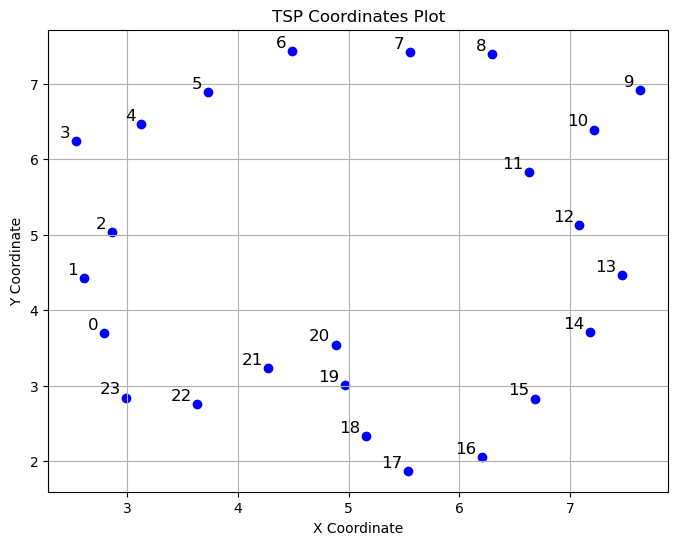

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def label_cities(data):
    for i, (x, y) in enumerate(zip(data[0], data[1])):
        plt.text(x - 0.05, y + 0.05, str(i), fontsize=12, ha='right')

def load_matrix(file_path):

    coordinates = pd.read_csv(file_path, header=None)

    x = coordinates[0]
    y = coordinates[1]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue')
    
    label_cities(coordinates)
    
    plt.title('TSP Coordinates Plot')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)

    plt.show()
    
    return coordinates

coordinates = load_matrix(MATRIX_FILE_PATH)


## Use Euclidean distance formula to calculate inter-city distance

In [22]:
def calculate_euclidean_distance(df):
    x = df[0].values
    y = df[1].values

    n_points = len(x)

    distance_matrix = pd.DataFrame(np.zeros((n_points, n_points)))

    for i in range(n_points):
        for j in range(n_points):
            distance = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)
            distance_matrix.iloc[i, j] = distance

    return distance_matrix

distance_matrix = calculate_euclidean_distance(coordinates)

# 結果を表示
print(distance_matrix)


          0         1         2         3         4         5         6   \
0   0.000000  0.754828  1.344955  2.564838  2.796048  3.327688  4.111249   
1   0.754828  0.000000  0.662256  1.822121  2.109786  2.705419  3.553030   
2   1.344955  0.662256  0.000000  1.250632  1.457410  2.043680  2.901820   
3   2.564838  1.822121  1.250632  0.000000  0.627936  1.349135  2.283698   
4   2.796048  2.109786  1.457410  0.627936  0.000000  0.731248  1.670595   
5   3.327688  2.705419  2.043680  1.349135  0.731248  0.000000  0.939428   
6   4.111249  3.553030  2.901820  2.283698  1.670595  0.939428  0.000000   
7   4.641222  4.205051  3.599568  3.235777  2.607870  1.903985  1.066704   
8   5.098828  4.739405  4.170696  3.931699  3.305480  2.622847  1.813853   
9   5.815422  5.610638  5.130404  5.137388  4.528793  3.906714  3.189670   
10  5.185921  5.016356  4.566652  4.682378  4.093980  3.527860  2.926181   
11  4.393320  4.264026  3.855338  4.114577  3.564831  3.093750  2.684420   
12  4.526200

## Step 1: Initial Solution: You can construct your own initial solution (based on either the random or greedy approach).

In [23]:
def calculate_total_distance(path, matrix):
    total_distance = 0
    for i in range(len(path) - 1):
        total_distance += matrix[path[i]][path[i+1]]
    return total_distance

def generate_random_initial_solution_from_coordinates(df):
    n_cities = len(df)
    
    cities = np.arange(n_cities)
    np.random.shuffle(cities)
        
    cities = np.append(cities, cities[0])
        
    return cities

initial_solution = generate_random_initial_solution_from_coordinates(coordinates)
initial_cost = calculate_total_distance(initial_solution, distance_matrix)

print(f"Initial Solution (randon): {initial_solution}")
print(f"Initial cost: {initial_cost}")


Initial Solution (randon): [14 22  2 11 20  0  6  9 12 15 18  1 13 17  5  8 10 23 21  3  7 19  4 16
 14]
Initial cost: 78.00025910816103


## Step 2: Neighbourhood operator: Do a swap of two adjacent cities. You are also encouraged to experiment with other neighbourhood operators.

In [35]:
def swap_two_adjacent_cities(path):
    new_path = path.copy()
    i = random.randint(1, len(path) - 3)  # exclude start and goal
    new_path[i], new_path[i + 1] = new_path[i + 1], new_path[i]
    return new_path

# Simulated Annealing Algorithm
def simulated_annealing(initial_solution, matrix, Tmax=TMAX, Tmin=TMIN, alpha=ALPHA, acceptance_probability=ACCEPTANCE_PROBABILITY):
    current_solution = initial_solution
    current_distance = calculate_total_distance(current_solution, matrix)
    best_solution = current_solution.copy()
    best_distance = current_distance
    T = Tmax

    history = [] 

    # start from Tmax until reaching Tmin
    while T > Tmin:
        new_solution = swap_two_adjacent_cities(current_solution)
        
        new_distance = calculate_total_distance(new_solution, matrix)

        # 解が改善された場合は更新、悪化した場合も確率的に受け入れ
        if new_distance < current_distance:
            current_solution = new_solution
            current_distance = new_distance
            status = "Good"
            probability = None
        else:
            # 確率的に悪化した解を許容するか判断
            probability = np.exp((current_distance - new_distance) / T)
            if acceptance_probability < probability:
                current_solution = new_solution
                current_distance = new_distance
                status = "Bad (Accepted)"
            else:
                status = "Bad (Rejected)"

        # update best solution
        if current_distance < best_distance:
            best_solution = current_solution.copy()
            best_distance = current_distance

        history.append((current_solution.copy(), current_distance, T, status, probability))

        # update temperature by using alpha
        T *= alpha

    return best_solution, best_distance, history


def run_simulated_annealing_n_times(n, initial_solution, matrix, Tmin, Tmax, alpha, probability):
    for i in range(n):
        best_solution, best_distance, history = simulated_annealing(
            initial_solution, 
            matrix, 
            Tmin=Tmin, 
            Tmax=Tmax, 
            alpha=alpha
        )
        print(f"Run {i+1}: Best Solution = {best_solution}, Best Distance = {best_distance}")
#         print("History of Improvements:")
#         for step, (solution, distance, temperature, status, probability) in enumerate(history):
#             print(f"Step {step+1}: Distance = {distance}, Temperature = {temperature:.4f}, Status = {status}", end="")
#             print(f"\n Path = {solution}")
#             if probability is not None:
#                 print(f"\n Acceptance Probability = {probability:.4f}")
#             else:
#                 print("")

        
run_simulated_annealing_n_times(
    10, 
    initial_solution, 
    distance_matrix, 
    TMIN, 
    TMAX, 
    ALPHA, 
    ACCEPTANCE_PROBABILITY
)


Run 1: Best Solution = [14 11  2  0 22 20  6  9 12 13 15 17 18  1  5  8 10 21 23  3  4  7 19 16
 14], Best Distance = 54.043321366939175
Run 2: Best Solution = [14 11  2  1  0 22 20  6  9 12 15 17 18 13 10  8  5 21 23  3  4  7 19 16
 14], Best Distance = 52.33437370629154
Run 3: Best Solution = [14 11  2  0 22 20 12  9  6  1 18 17 15 13 10  8  5 21 23  3  4  7 19 16
 14], Best Distance = 54.238243035074255
Run 4: Best Solution = [14 22  0  2 12 11  6  1 20 15 13  9 17 18  5  8 10  3 23 21 16  7  4 19
 14], Best Distance = 67.03245479923575
Run 5: Best Solution = [14 22  0  2 12 11  9  6 20 18 17 15 13  1  5  8 10 19 21 23  3  4  7 16
 14], Best Distance = 56.7724137141608
Run 6: Best Solution = [14 22  0  2 11 12 20  6  9 15 17 18  1  5  8 10 13 21 23  3  4  7 19 16
 14], Best Distance = 58.38268018463419
Run 7: Best Solution = [14 11 20 22  0  2  6  9 12 15 17 18  1 13 10  8  5 21 23  3  4  7 19 16
 14], Best Distance = 55.27629266794188
Run 8: Best Solution = [14 11  2  0 22 20  6  9